In [8]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import plotly.express as px

In [38]:
#data = pd.read_excel('C:\Users\ramon\OneDrive\Área de Trabalho\Dados-Geolocalizacao.xlsx', sheet_name='Sheet1') 
#data = pd.read_csv('Dados-Geolocalizacao.csv')
df = pd.read_excel (r'C:\Users\ramon\OneDrive\Área de Trabalho\Dados-Geolocalizacao2.xlsx', sheet_name='Sheet1')

In [39]:
df.head()

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
0,0,#0&CN$#P@0RT253#9,0,2020-08-27 05:38:28,2020-08-27 05:38:33,-29983650,-50973330,RF,14
1,0,#0&CN$#P@0RT253#9,1,2020-08-27 05:39:08,2020-08-27 05:39:10,-29983640,-51132420,RF,13
2,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:52:32,2020-08-27 09:52:34,-29997250,-51135620,RF,12
3,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:52:47,2020-08-27 09:53:43,-29998200,-51136080,RF,12
4,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:53:34,2020-08-27 09:55:10,-29997910,-51139060,RF,12


In [13]:
df.loc[1904:1904]

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
1904,0,#0&CN$#X@DR9921$8,1,2020-08-27 12:15:39,2020-08-27 12:15:45,-23464850,-46345970,RF,14


In [40]:
df['Latitude'] = df['Latitude']/1000000
df['Longitude'] = df['Longitude']/1000000

In [41]:
df.head()

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
0,0,#0&CN$#P@0RT253#9,0,2020-08-27 05:38:28,2020-08-27 05:38:33,-29.98365,-50.97333,RF,14
1,0,#0&CN$#P@0RT253#9,1,2020-08-27 05:39:08,2020-08-27 05:39:10,-29.98364,-51.13242,RF,13
2,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:52:32,2020-08-27 09:52:34,-29.99725,-51.13562,RF,12
3,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:52:47,2020-08-27 09:53:43,-29.99820,-51.13608,RF,12
4,0,#0&CN$#P@0RT253#9,1,2020-08-27 09:53:34,2020-08-27 09:55:10,-29.99791,-51.13906,RF,12


In [42]:
df.shape

(32296, 9)

In [43]:
df['Tensão'].replace({'sem registro':np.nan},inplace=True)

In [44]:
df.interpolate(method='linear',limit_direction='forward',inplace=True)

In [45]:
df['Tensão'] = df['Tensão'].astype('int64')

In [46]:
df.dtypes

Bateria violada?                int64
Chassi                         object
Carro ligado?                   int64
Data de ocorrencia     datetime64[ns]
Data de recebimento    datetime64[ns]
Latitude                      float64
Longitude                     float64
Modo                           object
Tensão                          int64
dtype: object

In [47]:
df.describe()

,Bateria violada?,Carro ligado?,Latitude,Longitude,Tensão
count,32296.000000,32296.000000,32296.000000,32296.000000,32296.000000
mean,0.000712,0.750619,-22.786846,-46.626707,18.998359
std,0.026677,0.432661,4.519762,3.137850,23.090426
min,0.000000,0.000000,-41.025640,-56.089610,0.000000
25%,0.000000,1.000000,-23.668630,-48.007224,12.000000
50%,0.000000,1.000000,-23.548502,-46.577610,13.000000
75%,0.000000,1.000000,-22.849027,-46.414920,14.000000
max,1.000000,1.000000,-3.785750,-34.822450,100.000000


<AxesSubplot:>

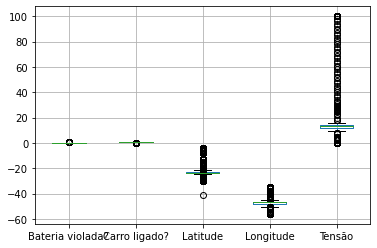

In [48]:
df.boxplot()

In [49]:
df.isnull().sum()

Bateria violada?       0
Chassi                 0
Carro ligado?          0
Data de ocorrencia     0
Data de recebimento    0
Latitude               0
Longitude              0
Modo                   0
Tensão                 0
dtype: int64

In [9]:
df.isnull()

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
32292,False,False,False,False,False,False,False,False,False
32293,False,False,False,False,False,False,False,False,False
32294,False,False,False,False,False,False,False,False,False
32295,False,False,False,False,False,False,False,False,False


In [10]:
#df_index = df[df['Bateria violada?'].isnull()].index.tolist()
df_index = df[df['Bateria violada?'].isnull()].index

In [11]:
df_index

Int64Index([19519], dtype='int64')

In [12]:
df.drop(19519, axis=0, inplace=True)

In [13]:
df.isnull().sum()

Bateria violada?        0
Chassi                  0
Carro ligado?           0
Data de ocorrencia      0
Data de recebimento     0
Latitude                0
Longitude               0
Modo                    0
Tensão                 47
dtype: int64

In [14]:
#df = df.fillna(np.nan)
df = df.fillna('sem registro')

In [15]:
df.isnull().sum()

Bateria violada?       0
Chassi                 0
Carro ligado?          0
Data de ocorrencia     0
Data de recebimento    0
Latitude               0
Longitude              0
Modo                   0
Tensão                 0
dtype: int64

In [142]:
#df.to_excel("output.xlsx", sheet_name='Sheet1')  
df.to_excel(r'C:\Users\ramon\OneDrive\Área de Trabalho\Dados-Geolocalizacao2.xlsx', sheet_name='Sheet1', index = False)
#df.to_csv(r"C:\Users\ramon\OneDrive\Área de Trabalho\Dados-Geolocalizacao2.csv", sep=';', encoding='utf-8')

In [38]:
#df['Bateria violada?'].groupby(['Bateria violada?']).count()
df['Bateria violada?'].count().sum()

32296

In [51]:
df.groupby(['Modo']).size()

Modo
GPRS    22933
RF       9363
dtype: int64

In [52]:
df.groupby(['Bateria violada?']).size()

Bateria violada?
0.0    32273
1.0       23
dtype: int64

In [59]:
#df.groupby('Chassi').nunique()
df.nunique()

Bateria violada?           2
Chassi                   302
Carro ligado?              2
Data de ocorrencia     24917
Data de recebimento    25433
Latitude               13868
Longitude              14220
Modo                       2
Tensão                    24
dtype: int64

In [60]:
df.groupby(['Tensão']).size()

Tensão
0.0       1314
2.0         11
3.0          2
4.0         40
5.0          4
7.0          1
8.0          3
9.0          1
10.0         7
11.0       113
12.0      9328
13.0     10056
14.0      8592
15.0       160
16.0         1
18.0         2
25.0        43
26.0        17
27.0         5
28.0       157
29.0        17
32.0         1
100.0     2374
nada        47
dtype: int64

In [68]:
df.groupby(['Chassi']).size().sort_values(ascending=False)

Chassi
#0D$CRYUWD&@2323T    1403
#0&SUT19@YRT8#2T2    1252
#0&CN$#X@SR9$@$95     926
#0D$CRYUYE&@$T$#2     921
#0P239TT@E8@3T5#@     682
                     ... 
#0&SN81S@HRT@21T8       1
#0D$DRYUU&&@T@355       1
#0D2CN8ST0&@9@892       1
#0&SN81S@URTT@19T       1
#0&CS$#X@CRT253T1       1
Length: 302, dtype: int64

In [110]:
#df_chassi = df[['Chassi']] == '#0&SUT19@YRT8#2T2'
#df_chassi=df['Chassi']=='#0&SUT19@YRT8#2T2'
df_mask=df['Bateria violada?']==1.0
filtered_df = df[df_mask]

In [111]:
#filtered_df = df[df_chassi]


In [112]:
filtered_df.shape

(23, 9)

In [116]:
filtered_df.sort_values(by='Data de ocorrencia', ascending=True)
#filtered_df[['Bateria violada?','Carro ligado?']].sum()

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
30560,1.0,#0P2510TD*U@@91@2,1.0,2020-08-27 11:19:13,2020-08-27 11:19:30,-15732630.0,-47857140.0,RF,12.0
4507,1.0,#0&CN$#X@DRT9@@35,1.0,2020-08-27 15:38:06,2020-08-27 15:38:08,-23409940.0,-46837120.0,GPRS,4.0
26614,1.0,#0P239TT@E8@3T5#@,1.0,2020-08-27 16:19:32,2020-08-27 16:19:34,-23536800.0,-46649920.0,RF,14.0
5745,1.0,#0&CN$#X@ERT9T$8$,0.0,2020-08-27 16:25:41,2020-08-27 16:26:13,-29967860.0,-51199540.0,GPRS,4.0
29790,1.0,#0P2510TD*U@92$89,0.0,2020-08-27 16:25:47,2020-08-27 16:25:49,-15813840.0,-47979260.0,RF,14.0
27744,1.0,#0P239TTTS8@@2TT8,0.0,2020-08-27 17:18:50,2020-08-27 19:06:34,-22858500.0,-43028460.0,RF,0.0
3115,1.0,#0&CN$#X@DRT3$T8$,1.0,2020-08-27 19:32:31,2020-08-27 19:32:37,-23586710.0,-46405380.0,RF,13.0
19239,1.0,#0D$CRYUWD&@2TT3T,0.0,2020-08-27 19:38:01,2020-08-27 19:39:17,-23659355.0,-46568164.0,GPRS,4.0
19243,1.0,#0D$CRYUWD&@2TT3T,0.0,2020-08-27 19:46:43,2020-08-27 19:47:58,-23659355.0,-46568164.0,GPRS,4.0
4632,1.0,#0&CN$#X@DRT9@@35,1.0,2020-08-27 20:00:57,2020-08-27 20:00:59,-23552130.0,-46466570.0,GPRS,4.0


In [50]:
df.describe()

,Bateria violada?,Carro ligado?,Latitude,Longitude,Tensão
count,32296.000000,32296.000000,32296.000000,32296.000000,32296.000000
mean,0.000712,0.750619,-22.786846,-46.626707,18.998359
std,0.026677,0.432661,4.519762,3.137850,23.090426
min,0.000000,0.000000,-41.025640,-56.089610,0.000000
25%,0.000000,1.000000,-23.668630,-48.007224,12.000000
50%,0.000000,1.000000,-23.548502,-46.577610,13.000000
75%,0.000000,1.000000,-22.849027,-46.414920,14.000000
max,1.000000,1.000000,-3.785750,-34.822450,100.000000


In [17]:
df.isnull().sum().sort_values(ascending=False)

Tensão                 0
Modo                   0
Longitude              0
Latitude               0
Data de recebimento    0
Data de ocorrencia     0
Carro ligado?          0
Chassi                 0
Bateria violada?       0
dtype: int64

In [51]:
df.corr()

,Bateria violada?,Carro ligado?,Latitude,Longitude,Tensão
Bateria violada?,1.000000,-0.022171,0.003414,0.006604,-0.012364
Carro ligado?,-0.022171,1.000000,-0.022034,-0.063426,-0.117702
Latitude,0.003414,-0.022034,1.000000,0.667984,0.003576
Longitude,0.006604,-0.063426,0.667984,1.000000,0.040580
Tensão,-0.012364,-0.117702,0.003576,0.040580,1.000000


In [20]:
data_mapa = data[['Chassi','Latitude','Longitude']]

mapa = px.scatter_mapbox (
                data_mapa,
                lat= 'Latitude',
                lon= 'Longitude',
                #hover_name='id',
                #hover_data=['price'],
                color_discrete_sequence=['blue'],
                zoom=3,
                height=300
                )
mapa.update_layout(mapbox_style='open-street-map')
mapa.update_layout(height=600, margin={'r':0, 't':0, 'l':0, 'b':0})
mapa.show()

ModuleNotFoundError: No module named 'plotly'

In [53]:
df.loc[0:1]

,Bateria violada?,Chassi,Carro ligado?,Data de ocorrencia,Data de recebimento,Latitude,Longitude,Modo,Tensão
0,0,#0&CN$#P@0RT253#9,0,2020-08-27 05:38:28,2020-08-27 05:38:33,-29.98365,-50.97333,RF,14
1,0,#0&CN$#P@0RT253#9,1,2020-08-27 05:39:08,2020-08-27 05:39:10,-29.98364,-51.13242,RF,13
